In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")
df

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [3]:
df["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.4, stratify=df["language"], random_state=42)
validation_df, test_df = train_test_split(test_df, test_size=0.5, stratify=test_df["language"], random_state=42)

In [5]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(13200, 2)
(4400, 2)
(4400, 2)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df["Text"])
y = train_df["language"]

In [7]:
X_valid= vectorizer.transform(validation_df["Text"])
y_valid = validation_df["language"]
X_test= vectorizer.transform(test_df["Text"])
y_test = test_df["language"]

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

SVC(kernel='linear')

In [9]:
y_pred = svm.predict(X_valid)

In [10]:
accuracy = accuracy_score(y_valid, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.9481818181818182


In [11]:
test_pred = svm.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, test_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.9579545454545455


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, test_pred)

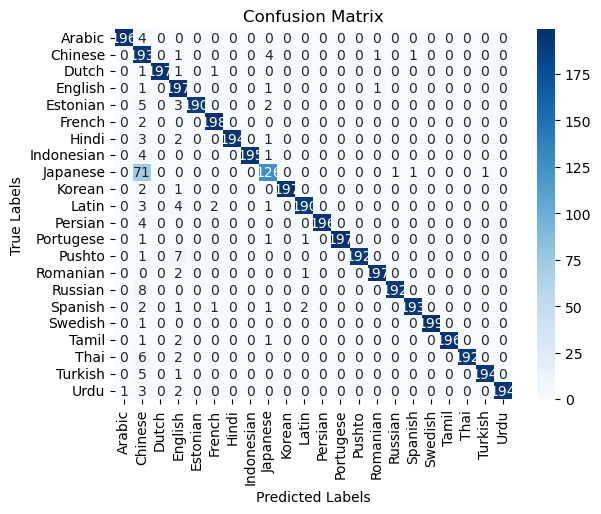

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot della matrice di confusione utilizzando Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Lingue e famiglie linguistiche

* uralo-altaiche: estone, coreano, giapponese, turco
* sinotibetane/austronesiane: cinese, thai
* indoeuropee: persiano, pushto (afgano), hindi
* germaniche: inglese, svedese, dutch
* slave: russo
* romanze: romeno, portoghese, spagnolo, francese, latino
* maleoploinesiaca: indonesiano
* indoarie: urdu
* dravidiche: tamil 
* afroasiatica: arabo

In [17]:
df["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [51]:
germaniche = df[df["language"].isin(["English", "Dutch", "Swedish"])] 
germaniche

,Text,language
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
4,de spons behoort tot het geslacht haliclona en...,Dutch
28,de prinses was als erfgename van polen een goe...,Dutch
37,in johnson was awarded an american institute ...,English
40,bussy-saint-georges has built its identity on ...,English
...,...,...
21955,mannheimer arbetade även under -talet i etiopi...,Swedish
21960,larressore is een gemeente in het franse depar...,Dutch
21963,phocas fokkens was vanaf lid en mede-oprichte...,Dutch
21964,op dit moment staat de zombie walk van oktobe...,Dutch


In [41]:
romanze = df[df["language"].isin(["Romanian", "Portugese", "Latin", "French", "Spanish"])]
romanze

,Text,language
7,müller mox figura centralis circulorum doctoru...,Latin
11,barocco pt escândalo de ª página é um filme fr...,Portugese
12,association de recherche et de sauvegarde de l...,French
17,diante destes gerenciamentos podendo ser feito...,Portugese
18,besemer s van der geest v murray j bijleveld c...,Portugese
...,...,...
21983,el investigador ha recibido varios reconocimie...,Spanish
21984,le village est une station familiale de sports...,French
21995,hors du terrain les années et sont des année...,French
21997,con motivo de la celebración del septuagésimoq...,Spanish


In [52]:
from sklearn.model_selection import train_test_split
train_germaniche, test_germaniche = train_test_split(germaniche, test_size=0.4, stratify=germaniche["language"], random_state=42)
validation_germaniche, test_germaniche = train_test_split(test_germaniche, test_size=0.5, stratify=test_germaniche["language"], random_state=42)

In [42]:
from sklearn.model_selection import train_test_split
train_romanze, test_romanze = train_test_split(romanze, test_size=0.4, stratify=romanze["language"], random_state=42)
validation_romanze, test_romanze = train_test_split(test_romanze, test_size=0.5, stratify=test_romanze["language"], random_state=42)

In [53]:
print(train_germaniche.shape)
print(validation_germaniche.shape)
print(test_germaniche.shape)

(1800, 2)
(600, 2)
(600, 2)


In [43]:
print(train_romanze.shape)
print(validation_romanze.shape)
print(test_romanze.shape)

(3000, 2)
(1000, 2)
(1000, 2)


### Romanze

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_romanze["Text"])
y = train_romanze["language"]

In [45]:
X_valid= vectorizer.transform(validation_romanze["Text"])
y_valid = validation_romanze["language"]
X_test= vectorizer.transform(test_romanze["Text"])
y_test = test_romanze["language"]

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

SVC(kernel='linear')

In [47]:
y_pred = svm.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.986


In [48]:
test_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.984


In [49]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, test_pred)

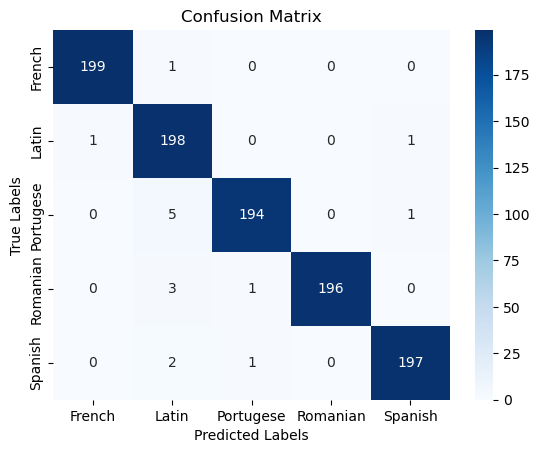

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot della matrice di confusione utilizzando Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Germaniche

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_germaniche["Text"])
y = train_germaniche["language"]

In [55]:
X_valid= vectorizer.transform(validation_germaniche["Text"])
y_valid = validation_germaniche["language"]
X_test= vectorizer.transform(test_germaniche["Text"])
y_test = test_germaniche["language"]

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

SVC(kernel='linear')

In [57]:
y_pred = svm.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.9983333333333333


In [58]:
test_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
print("Accuratezza:", accuracy)

Accuratezza: 0.995


In [59]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, test_pred)

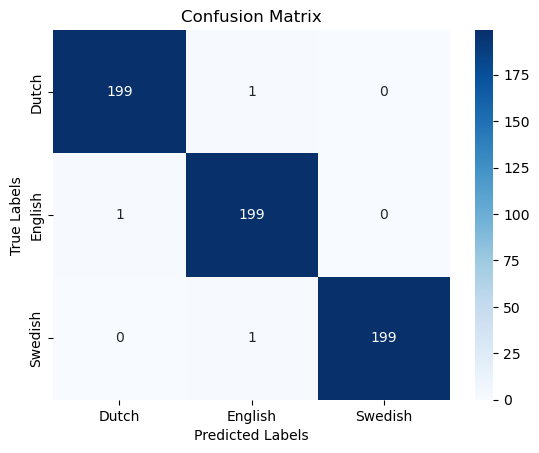

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot della matrice di confusione utilizzando Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()